



# Ford GoBike Exploration 
## by Omar Hazem

## Preliminary Wrangling


>Bay wheels -previously Ford GoBike-  is large-scale bicycle sharing system deployed in California and on the West Coast of the United States ,Bay wheels like have a large  fleet of sturdy and durable bikes that can be used then be locked into  a docking station from the huge network of docking stations that are distributed  throughout the city.The dataset used for this exploratory analysis is the newest published dataset as of  Jul 6th 2020, 02:29:56 am , you can find it here : <br> https://s3.amazonaws.com/baywheels-data/202006-baywheels-tripdata.csv.zip .

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [4]:
#import the dataset
df = pd.read_csv("/content/drive/My Drive/Project Template/202006-baywheels-tripdata.csv") 


In [5]:
#get the set first 5 entries 
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [6]:
#Gather info about dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158168 entries, 0 to 158167
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             158168 non-null  object 
 1   rideable_type       158168 non-null  object 
 2   started_at          158168 non-null  object 
 3   ended_at            158168 non-null  object 
 4   start_station_name  99220 non-null   object 
 5   start_station_id    99220 non-null   float64
 6   end_station_name    97151 non-null   object 
 7   end_station_id      97151 non-null   float64
 8   start_lat           158168 non-null  float64
 9   start_lng           158168 non-null  float64
 10  end_lat             157892 non-null  float64
 11  end_lng             157892 non-null  float64
 12  member_casual       158168 non-null  object 
dtypes: float64(6), object(7)
memory usage: 15.7+ MB


 Looks like we have alot of null values at attributes :
 -   start_station_name  <br>
 -  start_station_id     <br>
 -   end_station_name  <br>
 -  end_station_id      <br>


In [7]:
#let's see if there's any duplicates 
df.duplicated().sum()

0

 Good we have no duplicates , Next step let's count our null values to get better sense of how much loss if drop them

In [8]:
#Check for Null Values sum 
df.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    58948
start_station_id      58948
end_station_name      61017
end_station_id        61017
start_lat                 0
start_lng                 0
end_lat                 276
end_lng                 276
member_casual             0
dtype: int64

 Let's leave the null values for now and return to them back if needed 

In [9]:
#let's see the shape of our dataset 
df.shape

(158168, 13)

In [10]:
df.describe() # get statistical information about our 

,start_station_id,end_station_id,start_lat,start_lng,end_lat,end_lng
count,99220.000000,97151.000000,158168.000000,158168.000000,157892.000000,157892.000000
mean,222.670762,220.933104,37.730514,-122.353640,37.730497,-122.353779
std,170.109389,169.794631,0.140991,0.170709,0.141111,0.170778
min,3.000000,3.000000,37.240000,-122.510000,37.230000,-122.540000
25%,73.000000,73.000000,37.760000,-122.431873,37.760000,-122.431184
50%,156.000000,149.000000,37.773717,-122.412036,37.773532,-122.412073
75%,381.000000,380.000000,37.788396,-122.391173,37.788927,-122.391198
max,532.000000,532.000000,37.880222,-121.770000,37.950000,-121.760000


In [11]:
# print unique values for different features 
print("Members Types are ", df.member_casual.unique())
print("Ride types are",df.rideable_type.unique())
print("Start station names are ",df.start_station_name.unique())  
print("Start station names are " , df.end_station_name.unique())


Members Types are  ['casual' 'member']
Ride types are ['electric_bike' 'docked_bike']
Start station names are  [nan 'Powell St at Columbus Ave' 'Church St at Duboce Ave'
 'Cesar Chavez St at Dolores St'
 'Yerba Buena Center for the Arts (Howard St at 3rd St)'
 'The Embarcadero at Vallejo St' '29th St at Church St'
 'Green St at Van Ness Ave' '4th St at 16th St' '3rd St at Townsend St'
 '9th Ave at Geary Blvd' '8th St at Ringold St'
 'Eureka Valley Recreation Center' 'Carl St at Cole St'
 'Fell St at Stanyan St' 'Market St at Dolores St' 'Townsend St at 5th St'
 'Davis St at Jackson St' 'Arguello Blvd at Geary Blvd'
 'San Francisco Public Library (Grove St at Hyde St)'
 'St James St at 9th St' 'Guerrero Park' 'Valencia St at 16th St'
 'Broderick St at Oak St' 'Jackson Playground' 'Dolores St at 15th St'
 'The Embarcadero at Bryant St' 'Page St at Scott St'
 'Laurel St at California St' '23rd St at Tennessee St'
 '2nd St at Townsend St' 'Market St at Steuart St' 'Sanchez St at 15th St'
 

# Data Cleaning 

 Looks like our dataset is missing important column which is the duration of the ride , to add this column we will first need to transfer our columns :
ended_at , started_at to <font color = "orange" >datetime format 

In [12]:
df['ended_at'] = pd.to_datetime(df['ended_at']) # transfer column from string datatype to datetime
df['started_at'] = pd.to_datetime(df['started_at']) # transfer column from string datatype to datetime
df.head() # Preview the head to see if changes take place 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual


In [13]:
type(df['ended_at'][0]) # check datataype to ensure sucessful coversion 

pandas._libs.tslibs.timestamps.Timestamp

 Good now we are ready to make the ride duration column

In [14]:
#let's add new column indicating the duration of our ride 
df["ride_duration"]=df['ended_at']-df['started_at'] #The duration is endtime - starttime
df.head() #Preview head to see if changes took place 

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,00:11:18
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,00:21:15
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,00:14:38
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,00:35:29
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,00:50:04


 Interesting let's also get our month and year and day in separte columns 

In [15]:
df['year'] = pd.DatetimeIndex(df['started_at']).year # get the year and put it in a new column
df['month'] = pd.DatetimeIndex(df['started_at']).month # get the month and put it in a new column
df['day'] = pd.DatetimeIndex(df['started_at']).day # get the day and put it in a new column
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,year,month,day
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.40000,37.760000,-122.420000,casual,00:11:18,2020,6,3
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.49000,37.780000,-122.460000,casual,00:21:15,2020,6,3
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.41095,37.790000,-122.440000,casual,00:14:38,2020,6,2
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.41000,37.770000,-122.430000,casual,00:35:29,2020,6,2
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.42921,37.772894,-122.509079,casual,00:50:04,2020,6,3


Let's now indicate weekends :<br>
I used code indicated here in stackoverflow : https://stackoverflow.com/questions/32278728/convert-dataframe-date-row-to-a-weekend-not-weekend-value


In [16]:
df['weekend'] = (df['day']// 5 == 1) # create a column to indicate whether a weekend or not 
df.head(40)# get the first 40 entries of the dataset


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_duration,year,month,day,weekend
0,08A4A9F7315901F3,electric_bike,2020-06-03 16:37:10,2020-06-03 16:48:28,NaN,NaN,NaN,NaN,37.770000,-122.400000,37.760000,-122.420000,casual,00:11:18,2020,6,3,False
1,844F9D906468C441,electric_bike,2020-06-03 12:22:47,2020-06-03 12:44:02,NaN,NaN,NaN,NaN,37.780000,-122.490000,37.780000,-122.460000,casual,00:21:15,2020,6,3,False
2,0E441BF8A86C544E,electric_bike,2020-06-02 17:37:43,2020-06-02 17:52:21,Powell St at Columbus Ave,487.0,NaN,NaN,37.800426,-122.410950,37.790000,-122.440000,casual,00:14:38,2020,6,2,False
3,CAFE64864422F475,electric_bike,2020-06-02 18:13:01,2020-06-02 18:48:30,NaN,NaN,NaN,NaN,37.760000,-122.410000,37.770000,-122.430000,casual,00:35:29,2020,6,2,False
4,172957A20160D568,electric_bike,2020-06-03 15:16:06,2020-06-03 16:06:10,Church St at Duboce Ave,85.0,48th Ave at Cabrillo St,521.0,37.769841,-122.429210,37.772894,-122.509079,casual,00:50:04,2020,6,3,False
5,69E225093739C325,electric_bike,2020-06-03 16:10:53,2020-06-03 16:24:42,NaN,NaN,NaN,NaN,37.780000,-122.440000,37.760000,-122.430000,casual,00:13:49,2020,6,3,False
6,2694981712A0D672,electric_bike,2020-06-03 16:26:38,2020-06-03 16:30:34,NaN,NaN,NaN,NaN,37.770000,-122.390000,37.770000,-122.390000,casual,00:03:56,2020,6,3,False
7,675ADCACD1F825A2,electric_bike,2020-06-03 07:54:46,2020-06-03 08:11:25,NaN,NaN,Yerba Buena Center for the Arts (Howard St at ...,284.0,37.760000,-122.420000,37.785049,-122.400953,casual,00:16:39,2020,6,3,False
8,AC29BDD9051D1827,electric_bike,2020-06-03 12:13:30,2020-06-03 12:36:27,Cesar Chavez St at Dolores St,140.0,4th St at 16th St,104.0,37.747758,-122.425121,37.767008,-122.390851,casual,00:22:57,2020,6,3,False
9,DA3A000674FF5516,electric_bike,2020-06-03 14:49:24,2020-06-03 15:06:48,NaN,NaN,NaN,NaN,37.810000,-122.410000,37.790000,-122.420000,casual,00:17:24,2020,6,3,False


In [17]:
df.shape # get the shape of the dataset

(158168, 18)

### What is the structure of your dataset?

The dataset originally includes  <font  color ="Orange"> 158168 <font  color ="Black"> Trips with <font  color ="Orange"> 13 attributes / columns:
<br>
<font  color ="Black">
 	-ride_id 	
   -rideable_type 
   	-started_at
   -ended_at 	
   -start_station_name 	
   -start_station_id 	
   -end_station_name 	
   -end_station_id 
 	-start_lat 	
   -start_lng 	
   -end_lat 	
   -end_lng 	
   -member_casual
<br><br><br>
With the new five attributes/features I added :  <br>
-ride_duration 	
-year 	
-month 	
-day 
-weekend
<br>
the total will be 
<font  color ="Orange"> 18 attributes  

### What is/are the main feature(s) of interest in your dataset?

The interesting features are rideable_type which we might consider analyzing to see the most wanted type of rides also the member_casual feature might be of a benefit to know whether the most riders are members of casual users , also  	ride_duration feature might be useful to see when are most durations consumed riding and whether it's related by some other attribute like weekend or month  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
rideable_type ,  member_casual , month 	day , weekend , ride_duration  

## Univariate Exploration



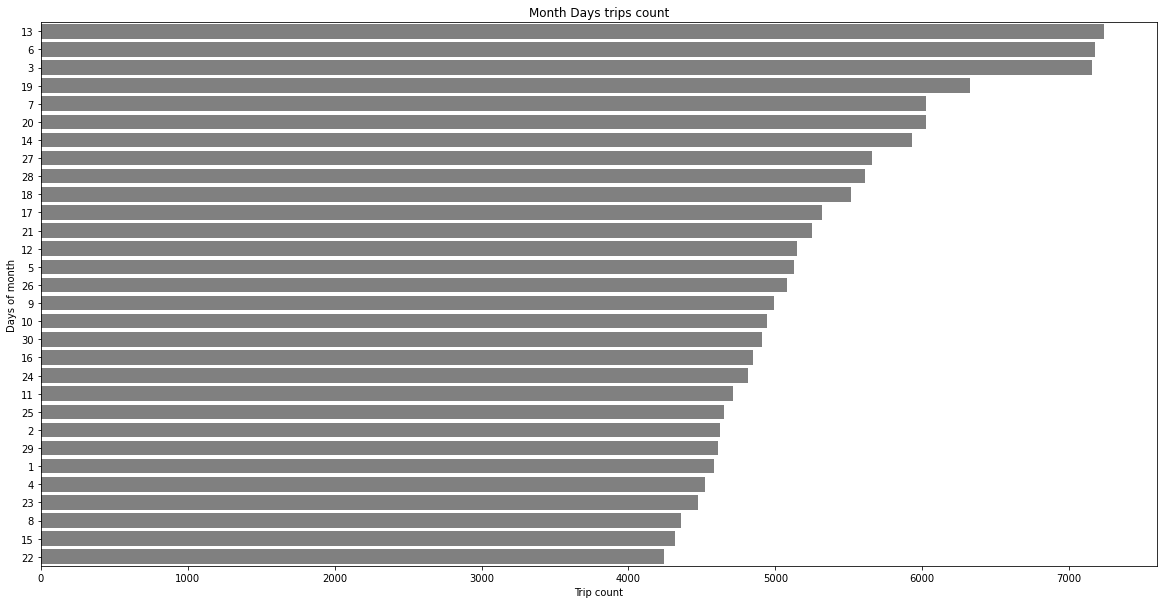

In [18]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, y='day', color="grey" , order = df.day.value_counts().index); # create a countplot
plt.ylabel('Days of month');#identify x axis label 
plt.xlabel('Trip count');#identify y axis label 
plt.title("Month Days trips count") ; #create title for the plot

 Interesting seems like days 13,6,3,19 have the most trips

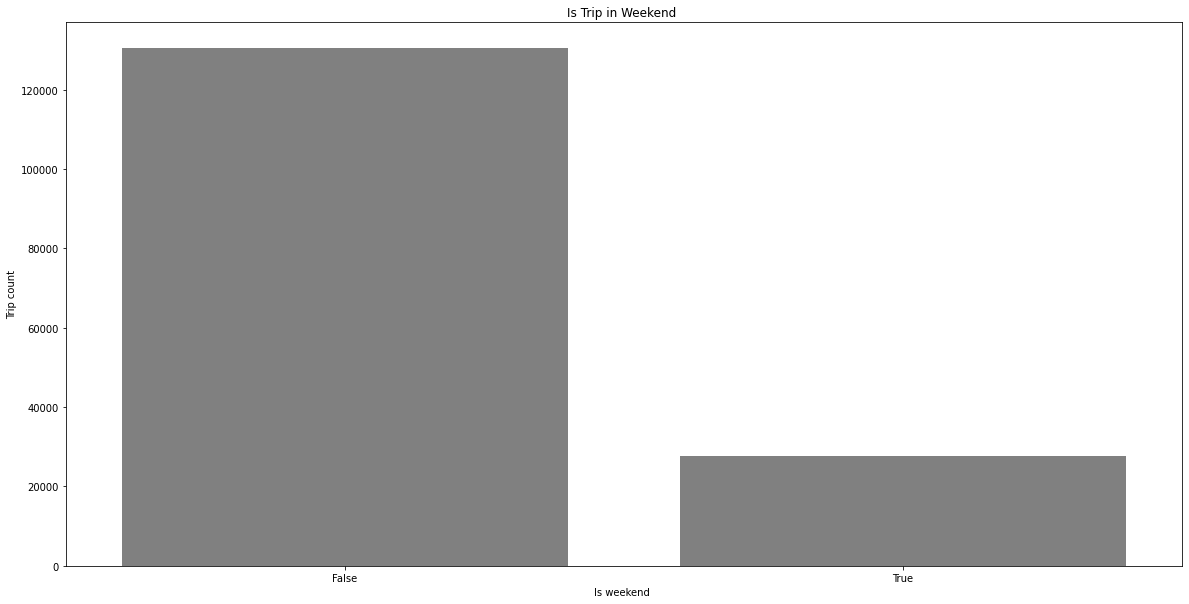

In [19]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, x='weekend', color="grey" , order = df.weekend.value_counts().index); # create a countplot
plt.xlabel('Is weekend ');#identify x axis label 
plt.ylabel('Trip count');#identify y axis label 
plt.title("Is Trip in Weekend ") ;#create title for the plot

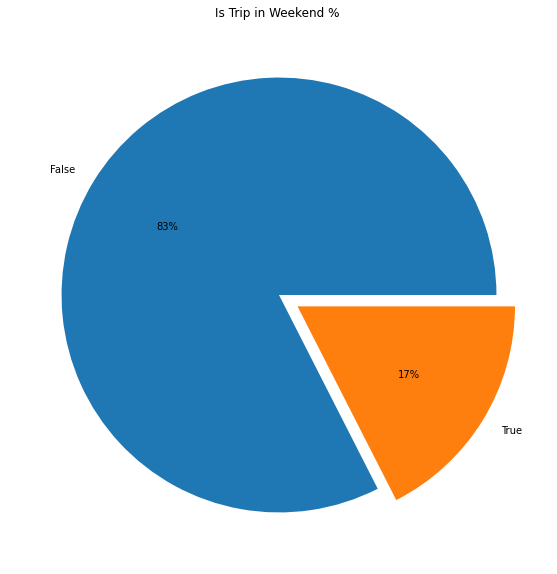

In [20]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
plt.pie(data=df, x=df.weekend.value_counts() , labels=["False","True"]
        ,autopct='%1.0f%%' , explode = (0 ,0.1)); # create a pie chart 
plt.title("Is Trip in Weekend % ") ;#create title for the plot

 Here we have a very interesting fact that weekend days have far less trips than non-weekend days  , Let's see  which months have maximum demand 

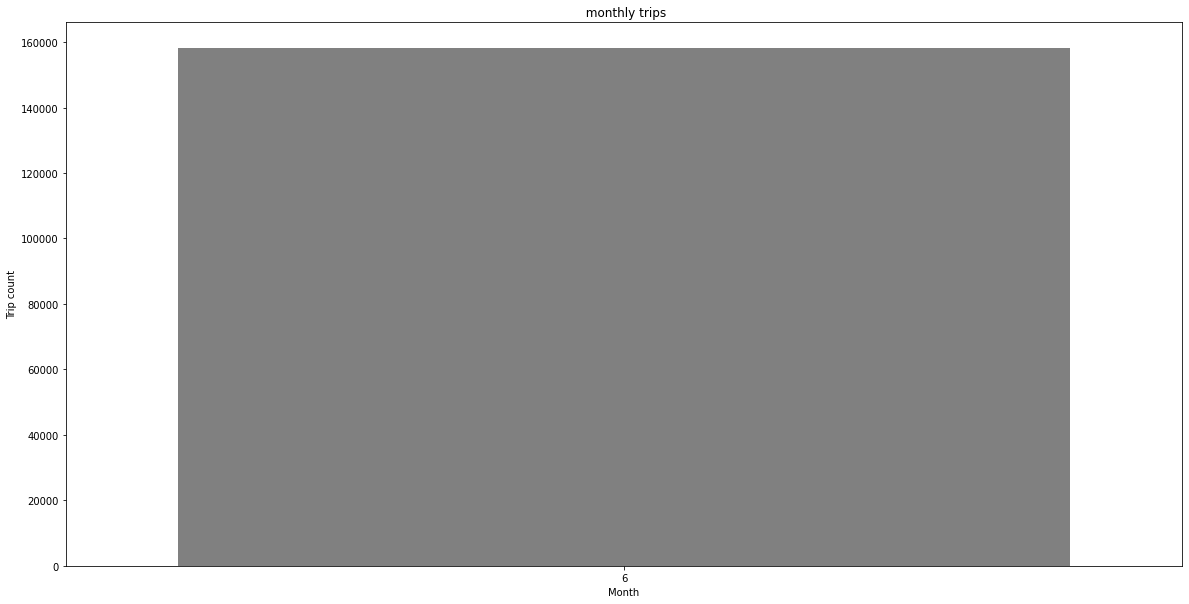

In [21]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, x='month', color="grey" , order = df.month.value_counts().index); # create a countplot
plt.xlabel('Month');#identify x axis label 
plt.ylabel('Trip count');#identify y axis label 
plt.title("  monthly trips ") ;#create title for the plot

 looks like our dataset is only a one month dataset 

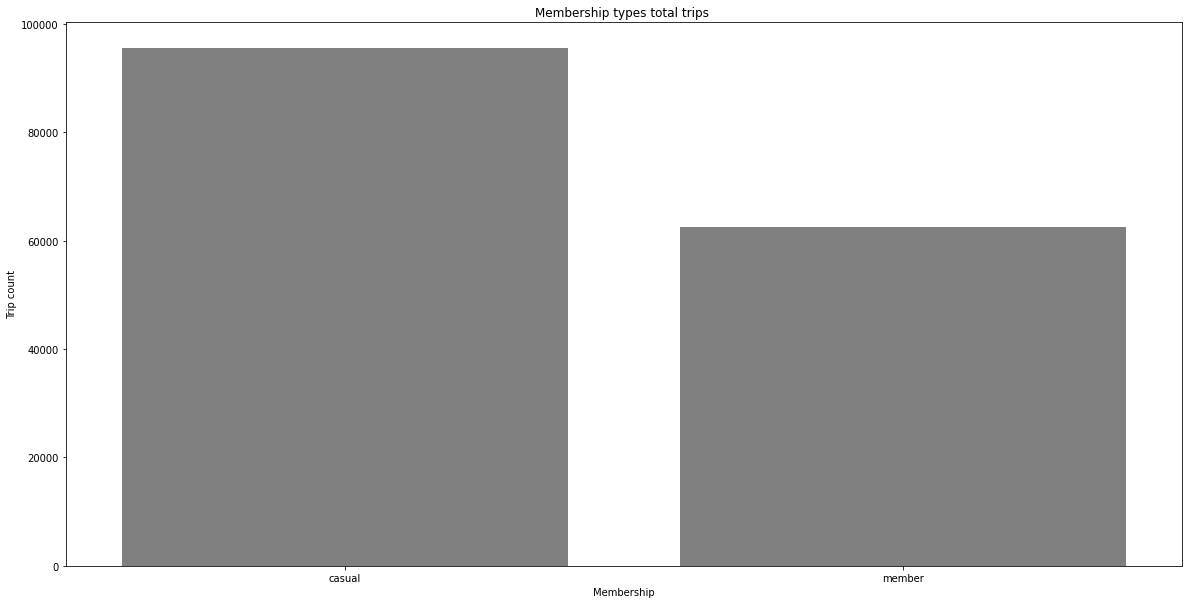

In [22]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, x='member_casual', color="grey" , order = df.member_casual.value_counts().index); # create a countplot
plt.xlabel('Membership');#identify x axis label 
plt.ylabel('Trip count');#identify y axis label  
plt.title("Membership types total trips ") ;#create title for the plot
 
 

 Looks like Casual riders trips are more than our members trips  

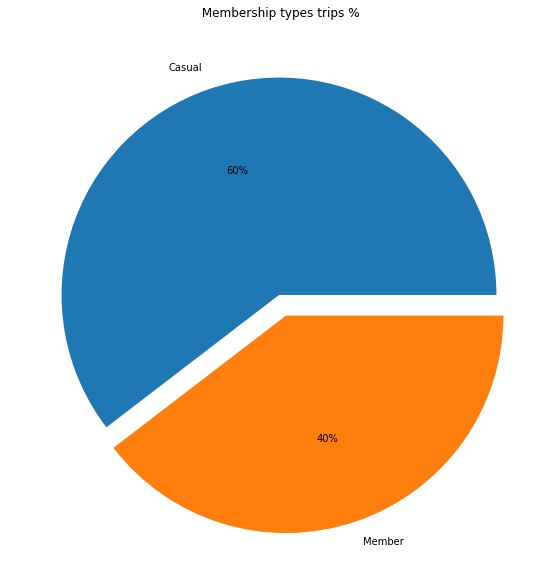

In [23]:

plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
plt.pie(data=df, x=df.member_casual.value_counts() , labels=["Casual","Member"]
        ,autopct='%1.0f%%' , explode = (0 ,0.1)); # create a pie chart 
plt.title(" Membership types trips %");#create title for the plot

 Looks like nearly two thirds of trips are related to casual riders

Let's see which is the most frequent duration for riders 

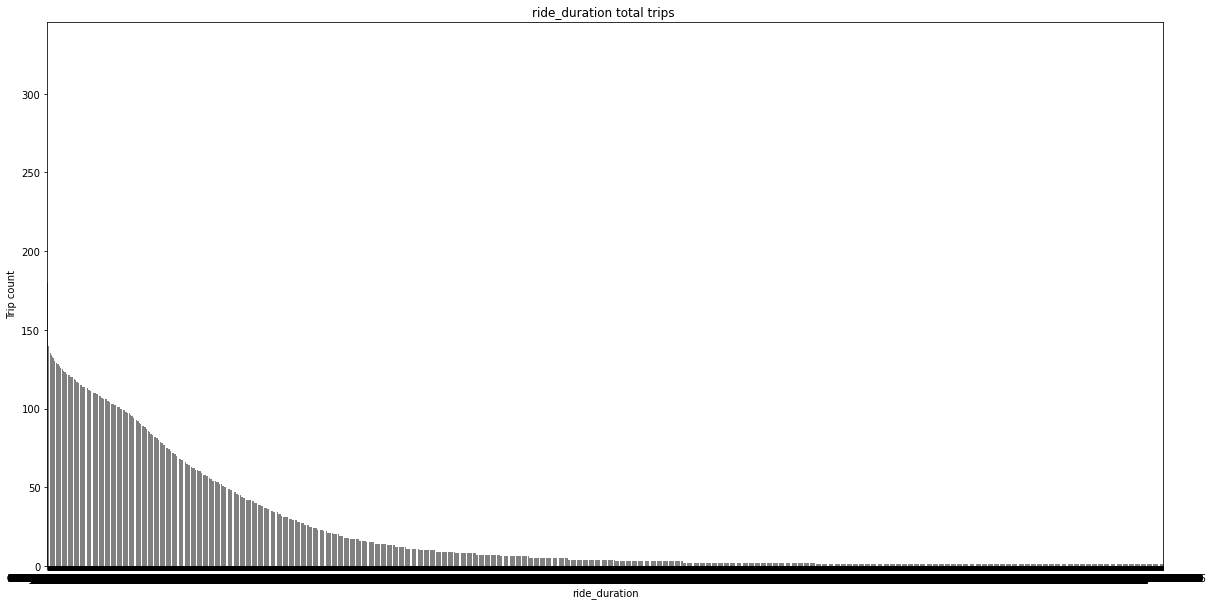

In [24]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, x='ride_duration', color="grey" , order = df.ride_duration.value_counts().index); # create a countplot
plt.xlabel('ride_duration');#identify x axis label 
plt.ylabel('Trip count');#identify y axis label  
plt.title("ride_duration total trips ") ;#create title for the plot

Looks like we need to make cahnges to duration to become more general to be able to plot it easily , let's change all durations to hours and round the decimals

In [25]:
rides_dur_in_hours= (df.ride_duration.dt.total_seconds()/(60*60)).astype(int) # covert ride 
                                          #duration to seconds and then convert it in terms of hours 
df['ride_duration_in_hours']=rides_dur_in_hours # make a feature with duration in hours 
df['ride_duration_in_hours'].value_counts() # get value counts 

0      150507
1        5880
2         953
24        242
3         240
        ...  
168         1
163         1
34          1
289         1
32          1
Name: ride_duration_in_hours, Length: 72, dtype: int64

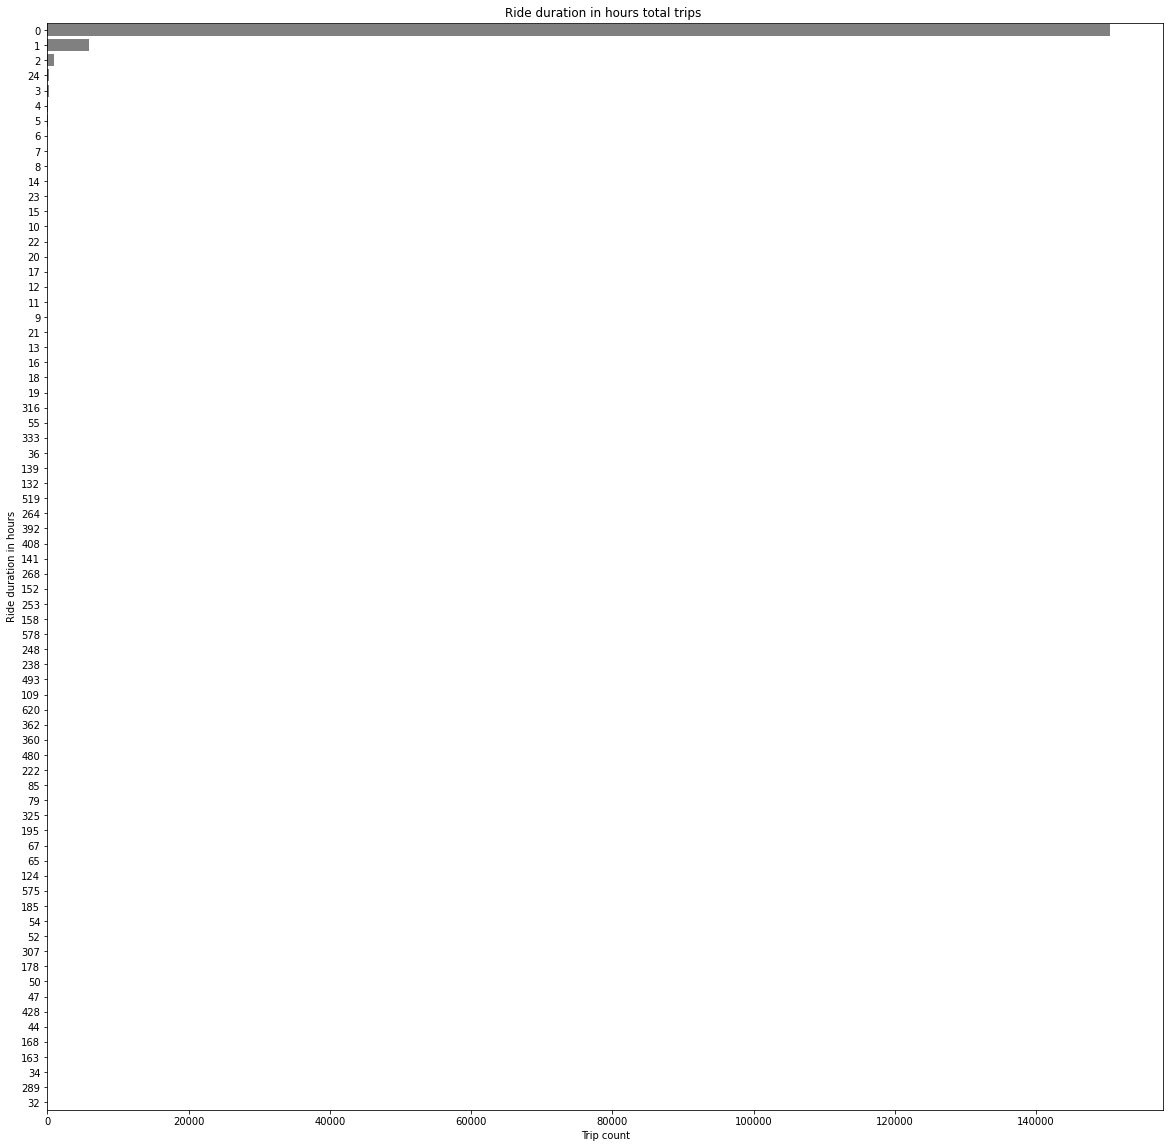

In [26]:
plt.figure(figsize = [20,20]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, y=df.ride_duration_in_hours, color="grey" , order = df.ride_duration_in_hours.value_counts().index); # create a countplot
plt.ylabel('Ride duration in hours');#identify x axis label 
plt.xlabel('Trip count');#identify y axis label  
plt.title("Ride duration in hours total trips ") ;#create title for the plot

Looks like most of our riders ride for less than one hour 

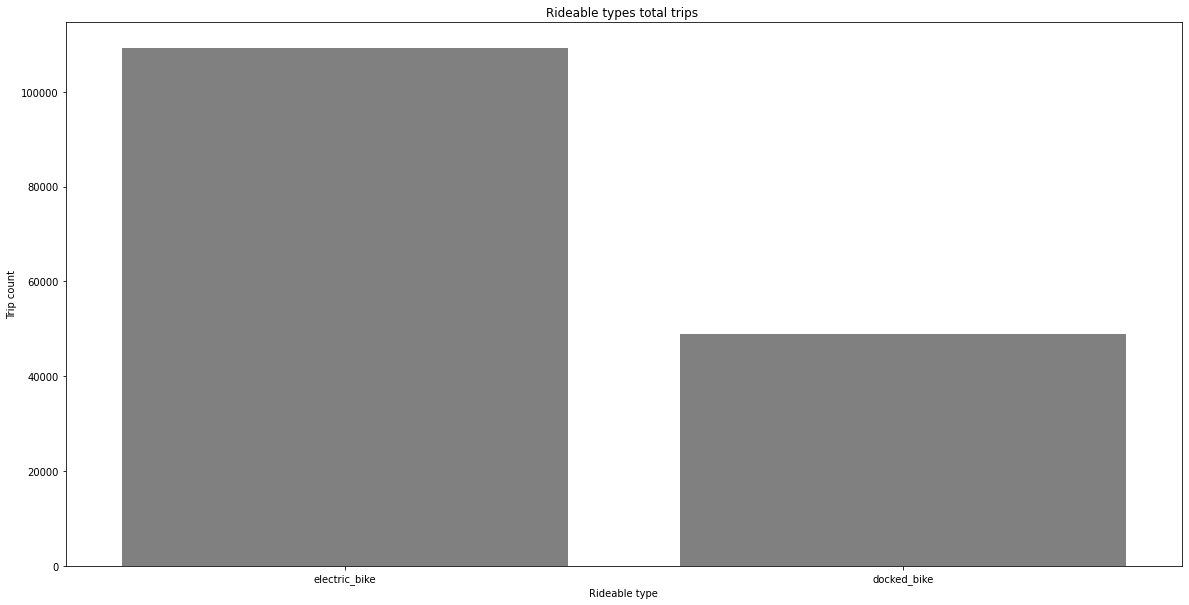

In [27]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
sb.countplot(data=df, x='rideable_type', color="grey" , order = df.rideable_type.value_counts().index); # create a countplot
plt.xlabel('Rideable type');#identify x axis label 
plt.ylabel('Trip count');#identify y axis label  
plt.title("Rideable types total trips ") ;#create title for the plot

Looks like electric bikes is the most wanted ride , let's use piechart to show and illustrate that even more 

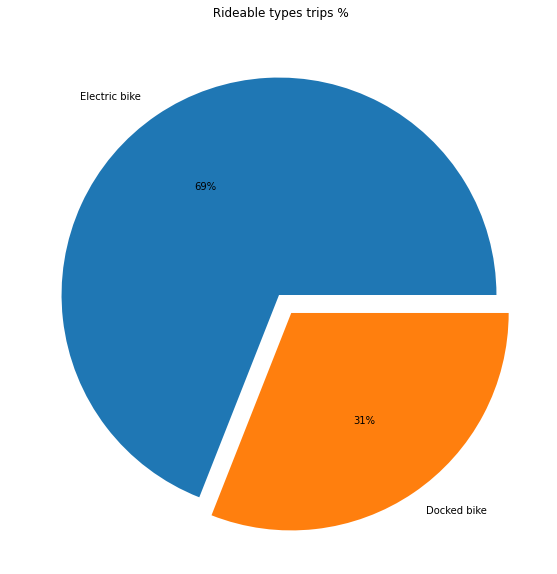

In [28]:
plt.figure(figsize = [20,10]) #choose larger figure size to make it bigger and more clear
plt.pie(data=df, x=df.rideable_type.value_counts() , labels=["Electric bike ","Docked bike "]
        ,autopct='%1.0f%%' , explode = (0 ,0.1)); # create a pie chart 
plt.title(" Rideable types trips %");#create title for the plot

Looks like Electric bikes are used far ahead than docked ones with more than 68% of the total trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of attributes are well distributed , Only ride duration attribute had to undergo some changes to be able to plot it this is due to the fact the the dataset calculate the time in high accuraccy (in Hours-Minutes-seconds) which make it very hard to have group of riders with the exact same riding duration so i had to change the scale from (Hours:Minutes:Seconds) to hours to be able to plot it and make observations 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Like mentioned in answer above only ride_duration had to be modified and also it data type was changes to integar to round anyy decimals to make it more suitable to plot and mor generalized

## Bivariate Exploration


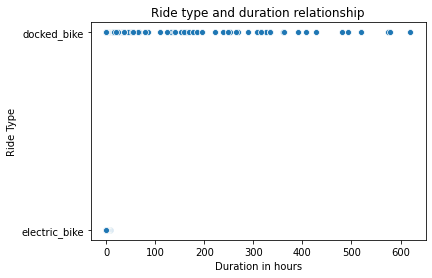

In [29]:
sb.scatterplot(data=df, y=df.rideable_type, x=df.ride_duration_in_hours);# create scatter plott
plt.xlabel('Duration in hours'); # create label for x-axis  
plt.ylabel('Ride Type');# create label for y-axis 
plt.title('Ride type and duration relationship'); # create Title for plot  

 Looks like Electric bikes are used mostly for less than 1 hour rides while docked bikes are used for more durations 

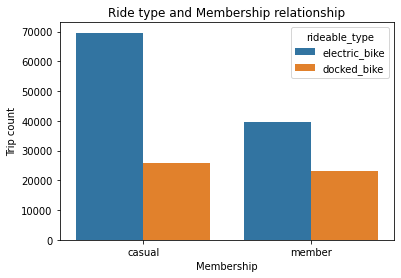

In [30]:
sb.countplot(data=df, x=df.member_casual, hue=df.rideable_type); #create countplot 
plt.xlabel('Membership');# create label for x-axis  
plt.ylabel('Trip count');# create label for y-axis 
plt.title('Ride type and Membership relationship');# create Title for plot  

 Like expected higher % of trips done by casual users are done by electric rides maybe that gives us more confidence in what we have seen above that electric bikes are used more in less than one hour trips which is most likely to be done by casual members , while we see in the other side members have not that much difference between trips number  done by the two types of rides

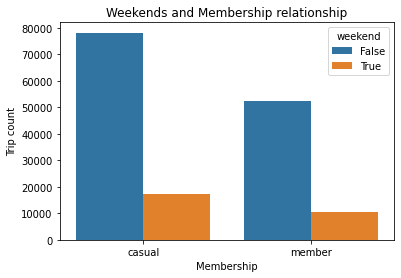

In [31]:
sb.countplot(data=df, hue='weekend',x =df.member_casual  ); # create a countplot

plt.xlabel('Membership');# create label for x-axis  
plt.ylabel('Trip count');# create label for y-axis  
plt.title('Weekends and Membership relationship');#create title for the plot

 Interestingly , we found that  casual members are making more trips in weekends than members 

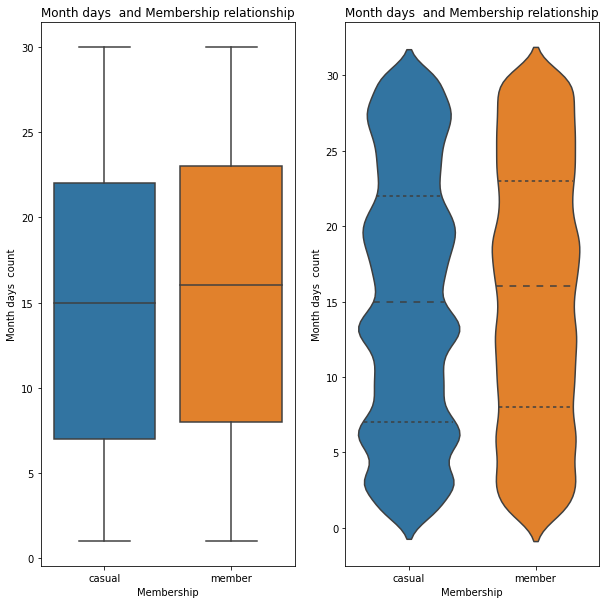

In [32]:
plt.figure(figsize=[10,10])#choose larger figure size to make it bigger and more clear
plt.subplot(1,2,1)# make subplots to view two plots side to side 
#First subplot is boxplot

sb.boxplot(data=df,  x=df.member_casual, y=df.day ); # create a boxplot

plt.xlabel('Membership');#identify x axis label
plt.ylabel('Month days  count');#identify y axis label 
plt.title('Month days  and Membership relationship');#create title for the plot


plt.subplot(1,2,2) 
#Second subplot is violinplot

sb.violinplot(data=df,  x=df.member_casual, y=df.day , inner = "quartile"); # create a violinplot

plt.xlabel('Membership');#identify x axis label
plt.ylabel('Month days  count');#identify y axis label 
plt.title('Month days  and Membership relationship');#create title for the plot

 From the above boxplot we can observe that  the casual members and members are very very similar in terms of which day they make trips but violinplot make it more clear thaat casual members do more trips especially in days 7,15,20,27

In [33]:
df.weekend.describe()

count     158168
unique         2
top        False
freq      130490
Name: weekend, dtype: object

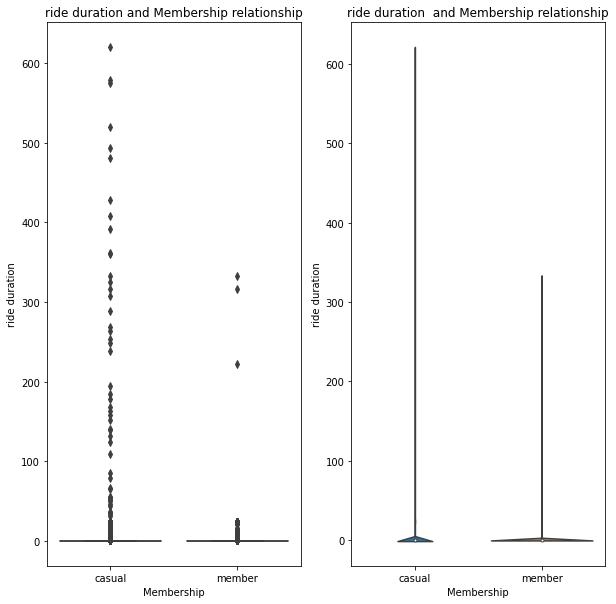

In [34]:
plt.figure(figsize=[10,10])#choose larger figure size to make it bigger and more clear
plt.subplot(1,2,1)# make subplots to view two plots side to side 
#First subplot is boxplot

sb.boxplot(data=df,  x=df.member_casual, y=df.ride_duration_in_hours) ; # create a boxplot

plt.xlabel('Membership');# create label for x-axis  
plt.ylabel('ride duration');# create label for y-axis  
plt.title('ride duration and Membership relationship');# create Title for plot  
plt.subplot(1,2,2)
#Second subplot is violinplot
sb.violinplot(data=df,  x=df.member_casual, y=df.ride_duration_in_hours) ; # create a violinplot

plt.xlabel('Membership');# create label for x-axis  
plt.ylabel('ride duration');# create label for y-axis  
plt.title('ride duration  and Membership relationship');# create Title for plot  

As Expected casual users make more ride durations and most ride durations are considered outliers this due to the fact that most part of durations is between 0-1 hour

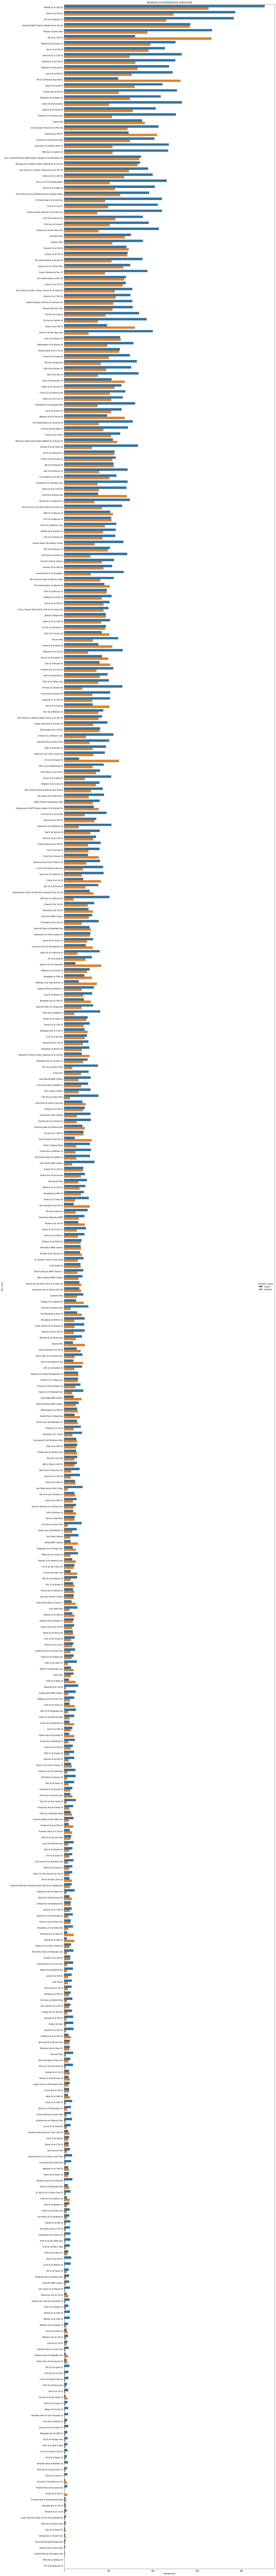

In [35]:
plt.figure(figsize =[20,250])#choose larger figure size to make it bigger and more clear
sb.countplot(data=df, y=df.start_station_name, hue =df.member_casual , order=df.start_station_name.value_counts().index ); 
# create a countplot

plt.xlabel('Membership');# create label for x-axis  
plt.ylabel('Trip count');# create label for y-axis  
plt.title('Weekends and Membership relationship');# create Title for plot  




The above plot is very big but we can get some important observations :<br>
-Looks like casual members are more consuming in most stations <br>
-Looks like most traffic is at Market st and Hyde st and since big part is casual users i suspect that these streets are  tourists' destinations so tourists (casual riders )tend to get rides at them at higher rates 

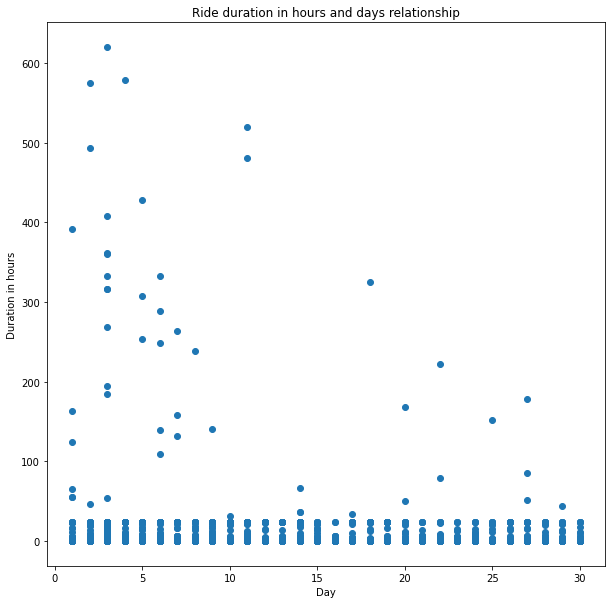

In [36]:
plt.figure(figsize=[10,10]) #choose larger figure size to make it bigger and more clear

plt.scatter(data=df, y='ride_duration_in_hours',  x='day' ); # create scatter plot 

plt.xlabel('Day'); # create label for x-axis  
plt.ylabel(' Duration in hours '); # create label for y-axis 
plt.title('Ride duration in hours and days relationship');# create Title for plot  

From the scatter graph above we can see that big part of long duration trips  is located in the first 10 days of the month ,and from 10 to 20 very small number of high duration trips are done ,We can also see that the long duration trips tend to increase at days 21-27 then decreaes again 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The long duration trips are almost in the first 10 days of month and also the couple of days at the end of the month , there's more trips done  by casual members than the members , casual members and members are very very similar in terms of which day they make trips but casual members do more trips especially in days 7,15,20,27 , most long duartion trips are done using docked bikes rather than electric ones 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

 Interestingly , we found that casual members are making more trips in weekends than members !!!


##Multivariate Exploration
Let's Finalize our findings using multivariate to join every thing together and come to concolusion 

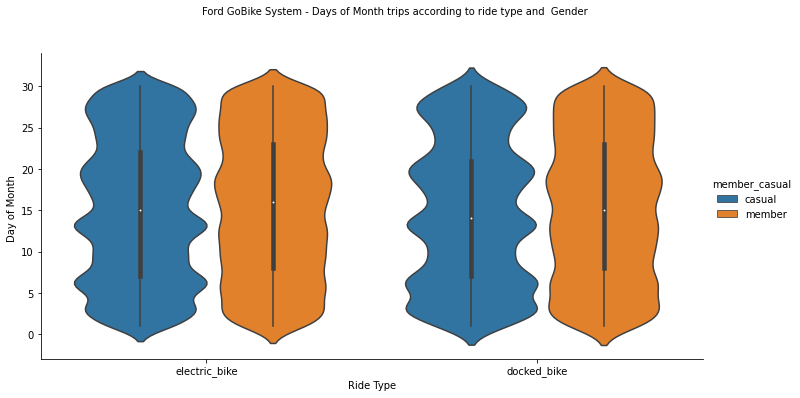

In [37]:
plot = sb.catplot(data=df, x='rideable_type', hue='member_casual', y='day',
                  kind="violin", height=5, aspect=2); # create a catplot 
plot.fig.suptitle('Ford GoBike System - Days of Month trips according to ride type and  Gender',
                  y=1.1, fontsize=10); # create a title for the plot and increase its font to be clear
plot.set_axis_labels("Ride Type","Day of Month "); # give the axes of the graph labels 
                                                  #(x-axis label , y-axis label)


 

Using The plot above we can see that both casual and member is very different in terms of rides we can see that the member users have nealy constant usage with no days that have further higher trips than others while the casual users has days that have noticable higher trips like days 6 , 13 , 20 

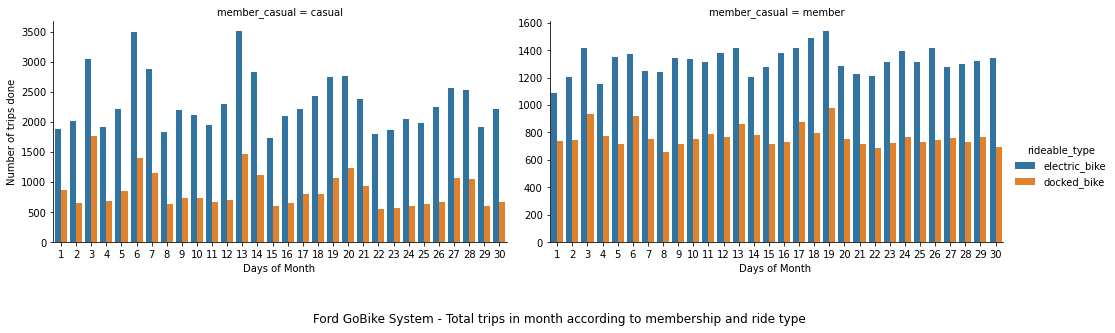

In [38]:
plot = sb.catplot(data=df, x='day', col="member_casual", hue="rideable_type", kind='count',
                  sharey = False, height = 4 , aspect=1.75);# create a catplot 
plot.fig.suptitle('Ford GoBike System - Total trips in month according to membership and ride type'
, y =-0.1);# create a title for the plot and move it down  to be more  clear
plot.set_axis_labels("Days of Month ", "Number of trips done");# give the axes of the graph labels 
                                                  #(x-axis label , y-axis label)



From the graph above we can see that number of trips done by members are far less than casual users in every single day we can see also that the peak of trips was at day 13 and 5 for casual users while day 19 for members we can also see that casual users use docked bikes less than electric ones by nealy 75 % while members us docked bikes less than electric ones by nearly 30-50 % , also we can see that like the above voilin graph that the use of members is nearly consistend and doesn't decrease or increase exponentially (much) while in the other hand the casual users usage decrease and increase by higher rates 


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
casual and member is very different in terms of rides we can see that the member users have nearly constant usage with no days that have further higher trips than others while the casual users has days that have noticable higher trips like days 6 , 13 , 20 , Also casual users use docked bikes less than electric ones by nearly 75 % while members us docked bikes less than electric ones by nearly 30-50 % 

### Were there any interesting or surprising interactions between features?

Nothing unexpected this part served as a proof of correctness for previous parts


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!